# Задание по теме 7 «Основы визуализации данных в Python»

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

from pylab import rcParams
rcParams['figure.figsize'] = 10,6

Описание задания

Постройте пять графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы две из рассмотренных на занятии библиотек. 

Опишите для каждого графика:
- какого типа переменные участвуют в визуализации;
- какова её цель (например: посмотреть на корреляцию двух величин или на распределение значений);
- почему выбрали именно такой тип графика.


In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\TMDB 5000 Movie Dataset\tmdb_5000_movies.csv')

In [3]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [4]:
df.drop(['homepage', 'keywords'], axis=1, inplace = True)

In [5]:
df.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   original_language     4803 non-null   object 
 4   original_title        4803 non-null   object 
 5   overview              4800 non-null   object 
 6   popularity            4803 non-null   float64
 7   production_companies  4803 non-null   object 
 8   production_countries  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  title                

<BarContainer object of 20 artists>

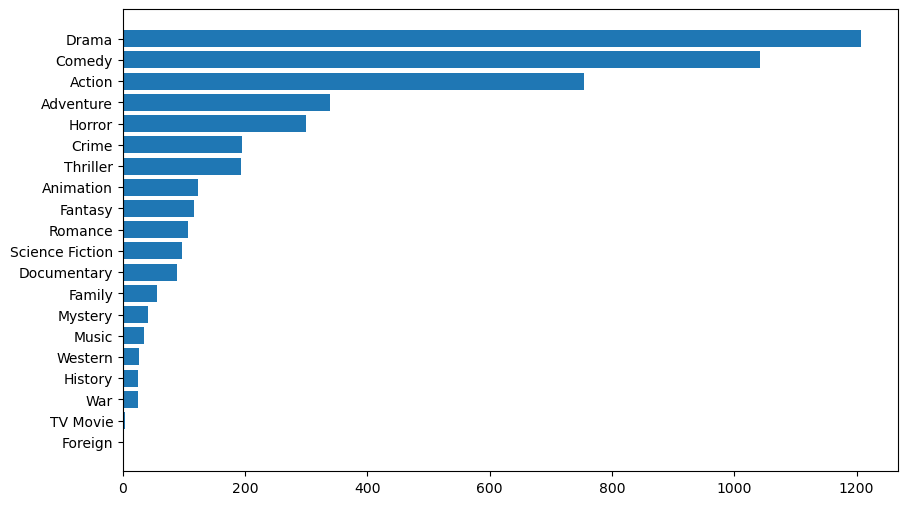

In [7]:
df['genres'] = df['genres'].apply(json.loads)
df['genre'] = df['genres'].apply(lambda x: x[0]['name'] if x else None)
genre_counts = df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

genre_counts = genre_counts[::-1]
plt.barh(genre_counts['genre'], genre_counts['count'])

- Тип переменных:genre(жанр) - str, count(кол-во фильмов по жанрам) - int
- Цель визуализации: посмотреть распределение кол-ва фильмов по жанрам
- Тип графика: при большом кол-ве столбцов столбчатая диаграмма проще воспринимается

<Axes: >

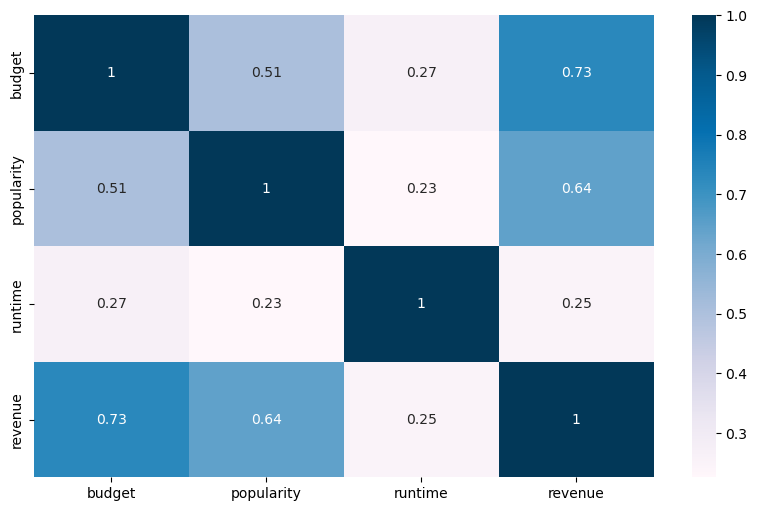

In [8]:
sns.heatmap(df[['budget', 'popularity', 'runtime', 'revenue']].corr(), annot=True, cmap='PuBu')

- Тип переменных: четыре переменные типа float
- Цель визуализации: показать корреляию между 4мя преременными  
- Тип графика: степень корреляции отражается разным цветом, что делает график более наглядным нежели таблица 

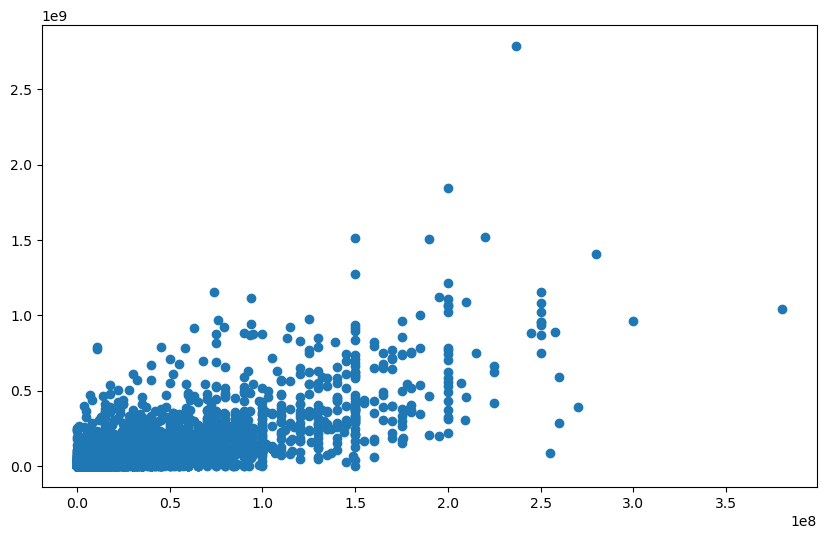

In [9]:
plt.scatter(df['budget'], df['revenue'])

- Тип переменных: две переменные типа float
- Цель визуализации: показать зависимость между бюджетом и сборами
- Тип графика: удобное представление зависимости между двумя переменными

<Axes: >

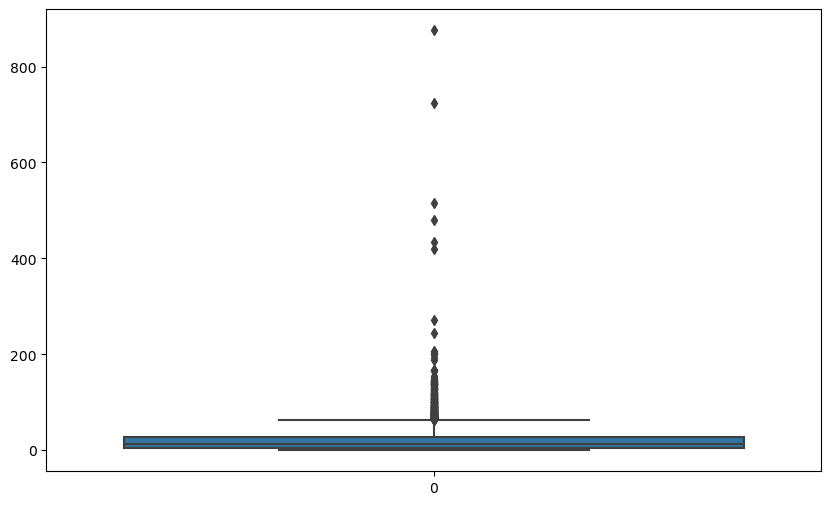

In [10]:
sns.boxplot(data=df['popularity'])

- Тип переменных:float 
- Цель визуализации: показать выбросы в данных
- Тип графика: для отображения распределения числовых данных

(1930.0, 2017.0)

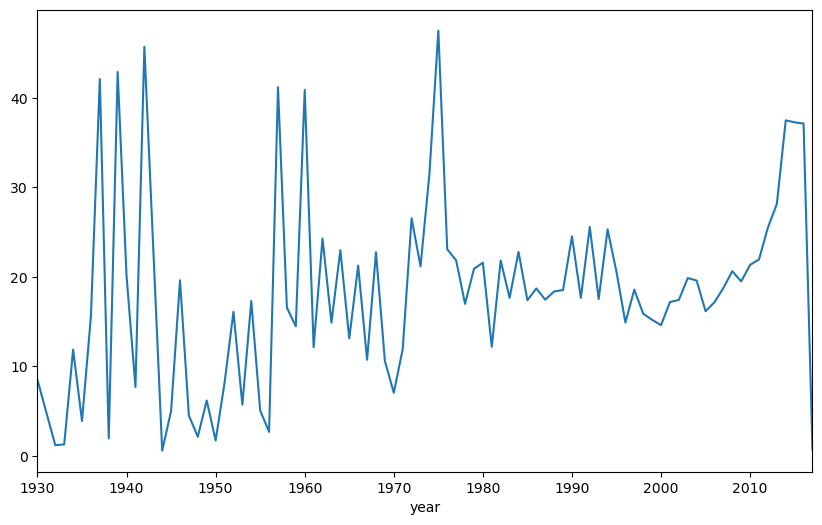

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
grouped_df = df.groupby('year')['popularity'].mean()

grouped_df.plot()
plt.xlim(1930, 2017)

- Тип переменных: year(год релиза) - int и popularity(популярность фильма) - float
- Цель визуализации: показать изменение средней популярности фильмов на промежуке 1930 - 2017
- Тип графика: для визуализации изменения средней популярности фильмов во времени